In [2]:
import csv

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 40

# Specify each path

In [3]:
dataset = 'model/keypoint.csv'
model_save_path = 'model/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier.tflite'

# Set number of classes

In [5]:
NUM_CLASSES = 9

# Dataset reading

In [6]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [7]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([500, 553, 546, 521, 550, 490, 459, 381, 590], dtype=int64))


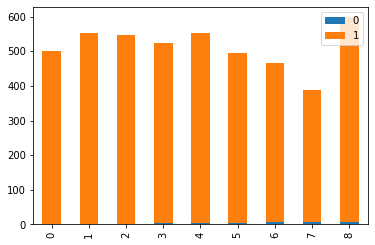

In [9]:
# Classes count
counts = np.unique(y_dataset, return_counts=True)
df = pd.DataFrame(counts)
df.T.plot(kind="bar", stacked=True)
print(counts)

# Model building

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [16]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_6 (Dropout)          (None, 42)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 20)                860       
_________________________________________________________________
dropout_7 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_11 (Dense)             (None, 9)                 144       
Total params: 1,319
Trainable params: 1,319
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [18]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [19]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
27/27 [==============================] - 1s 8ms/step - loss: 2.2037 - accuracy: 0.1365 - val_loss: 2.0554 - val_accuracy: 0.2439

Epoch 00001: saving model to model\keypoint_classifier.hdf5
Epoch 2/1000
27/27 [==============================] - 0s 2ms/step - loss: 2.0425 - accuracy: 0.2275 - val_loss: 1.8829 - val_accuracy: 0.3301

Epoch 00002: saving model to model\keypoint_classifier.hdf5
Epoch 3/1000
27/27 [==============================] - 0s 2ms/step - loss: 1.8638 - accuracy: 0.3202 - val_loss: 1.6861 - val_accuracy: 0.3711

Epoch 00003: saving model to model\keypoint_classifier.hdf5
Epoch 4/1000
27/27 [==============================] - 0s 3ms/step - loss: 1.6995 - accuracy: 0.3585 - val_loss: 1.4791 - val_accuracy: 0.4051

Epoch 00004: saving model to model\keypoint_classifier.hdf5
Epoch 5/1000
27/27 [==============================] - 0s 4ms/step - loss: 1.5310 - accuracy: 0.3974 - val_loss: 1.2974 - val_accuracy: 0.5418

Epoch 00005: saving model to model\keypoint_c

27/27 [==============================] - 0s 2ms/step - loss: 0.5538 - accuracy: 0.7847 - val_loss: 0.2281 - val_accuracy: 0.9434

Epoch 00041: saving model to model\keypoint_classifier.hdf5
Epoch 42/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.7853 - val_loss: 0.2243 - val_accuracy: 0.9800

Epoch 00042: saving model to model\keypoint_classifier.hdf5
Epoch 43/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5719 - accuracy: 0.7780 - val_loss: 0.2272 - val_accuracy: 0.9800

Epoch 00043: saving model to model\keypoint_classifier.hdf5
Epoch 44/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5658 - accuracy: 0.7847 - val_loss: 0.2166 - val_accuracy: 0.9913

Epoch 00044: saving model to model\keypoint_classifier.hdf5
Epoch 45/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5317 - accuracy: 0.7960 - val_loss: 0.2093 - val_accuracy: 0.9834

Epoch 00045: saving model to model\keypoint_classifier

27/27 [==============================] - 0s 6ms/step - loss: 0.4341 - accuracy: 0.8300 - val_loss: 0.1390 - val_accuracy: 0.9869

Epoch 00081: saving model to model\keypoint_classifier.hdf5
Epoch 82/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.4578 - accuracy: 0.8274 - val_loss: 0.1436 - val_accuracy: 0.9869

Epoch 00082: saving model to model\keypoint_classifier.hdf5
Epoch 83/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.4420 - accuracy: 0.8338 - val_loss: 0.1320 - val_accuracy: 0.9948

Epoch 00083: saving model to model\keypoint_classifier.hdf5
Epoch 84/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.4442 - accuracy: 0.8277 - val_loss: 0.1327 - val_accuracy: 0.9878

Epoch 00084: saving model to model\keypoint_classifier.hdf5
Epoch 85/1000
27/27 [==============================] - 0s 5ms/step - loss: 0.4086 - accuracy: 0.8420 - val_loss: 0.1296 - val_accuracy: 0.9817

Epoch 00085: saving model to model\keypoint_classifier

27/27 [==============================] - 0s 3ms/step - loss: 0.3875 - accuracy: 0.8440 - val_loss: 0.1221 - val_accuracy: 0.9782

Epoch 00121: saving model to model\keypoint_classifier.hdf5
Epoch 122/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.3764 - accuracy: 0.8510 - val_loss: 0.1119 - val_accuracy: 0.9852

Epoch 00122: saving model to model\keypoint_classifier.hdf5
Epoch 123/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.3666 - accuracy: 0.8559 - val_loss: 0.1144 - val_accuracy: 0.9800

Epoch 00123: saving model to model\keypoint_classifier.hdf5
Epoch 124/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.3896 - accuracy: 0.8544 - val_loss: 0.1198 - val_accuracy: 0.9782

Epoch 00124: saving model to model\keypoint_classifier.hdf5
Epoch 125/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.3888 - accuracy: 0.8451 - val_loss: 0.1092 - val_accuracy: 0.9939

Epoch 00125: saving model to model\keypoint_classi

In [20]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

9/9 [==============================] - 0s 1ms/step - loss: 0.1102 - accuracy: 0.9852


In [21]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [22]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[2.4234410e-05 1.3704991e-02 4.9538934e-03 5.2932743e-03 6.0819439e-04
 1.3937769e-05 2.6231460e-04 9.7513539e-01 3.8284074e-06]
7


# Confusion matrix

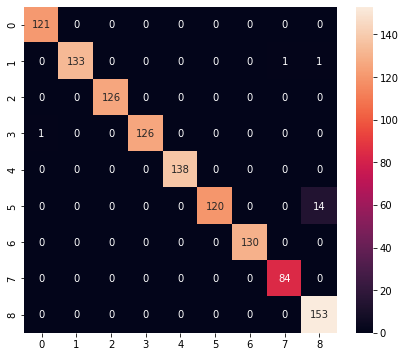

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       121
           1       1.00      0.99      0.99       135
           2       1.00      1.00      1.00       126
           3       1.00      0.99      1.00       127
           4       1.00      1.00      1.00       138
           5       1.00      0.90      0.94       134
           6       1.00      1.00      1.00       130
           7       0.99      1.00      0.99        84
           8       0.91      1.00      0.95       153

    accuracy                           0.99      1148
   macro avg       0.99      0.99      0.99      1148
weighted avg       0.99      0.99      0.99      1148



In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [24]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [25]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmpd33wd0nf\assets


7216

# Inference test

In [26]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [27]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [28]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [29]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [30]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.42344067e-05 1.37049835e-02 4.95388918e-03 5.29327197e-03
 6.08194969e-04 1.39377553e-05 2.62314832e-04 9.75135386e-01
 3.82841108e-06]
7
